# Relatório da Análise de Vendas
\
Este projeto analisou o dataset "Sample - Superstore", de origem educacional do Kaggle, para identificar os produtos mais lucrativos por categoria na Amazon. Após uma etapa de limpeza que removeu outliers significativos, a análise revelou que categorias como "Copiadoras" e "Fichários" têm lucro concentrado em poucos itens, enquanto "Mesas" e "Estantes" apresentam produtos com prejuízo, sugerindo uma necessidade de revisão estratégica.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import gdown
plt.style.use('ggplot')

In [4]:
Amazon = pd.read_csv("Amazon-2_Raw.csv", index_col=0)

In [5]:
Amazon.head()

,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
Order ID,,,,,,,,,
CA-2013-138688,6/13/2013,6/17/2013,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
CA-2011-115812,6/9/2011,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
CA-2011-115812,6/9/2011,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97
CA-2011-115812,6/9/2011,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
CA-2011-115812,6/9/2011,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


Problema: Analisar produtos que são mais contribuem para o lucro de cada categória.






In [6]:
Amazon.shape

(3203, 9)

#Limpeza de dados

**Análise inicial do data frame.**

In [7]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3203 entries, CA-2013-138688 to CA-2014-119914
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3203 non-null   object 
 1   Ship Date     3203 non-null   object 
 2   EmailID       3203 non-null   object 
 3   Geography     3203 non-null   object 
 4   Category      3203 non-null   object 
 5   Product Name  3203 non-null   object 
 6   Sales         3203 non-null   float64
 7   Quantity      3203 non-null   float64
 8   Profit        3203 non-null   float64
dtypes: float64(3), object(6)
memory usage: 250.2+ KB


É possível verificar que não há valores nulos e que os tipos dos dados estão corretos.

**Verificação se há dados duplicados.**

In [8]:
Amazon.duplicated()

,0
Order ID,
CA-2013-138688,False
CA-2011-115812,False
CA-2011-115812,False
CA-2011-115812,False
CA-2011-115812,False
...,...
CA-2013-125794,False
CA-2014-121258,False
CA-2014-121258,False


Não tem dados duplicados.

**Analíse geral das variáveis quantitativas.**

In [9]:
Amazon.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493234,3.828910,33.849029
std,524.876895,2.260947,174.109085
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


Focando na média, valores máximos e mínimos em relação a 'quantidade' não se percebe nenhuma inconsistência. Porém, nas vendas e lucros é perceptível valores fora do padrão.

**Observando as vendas.**

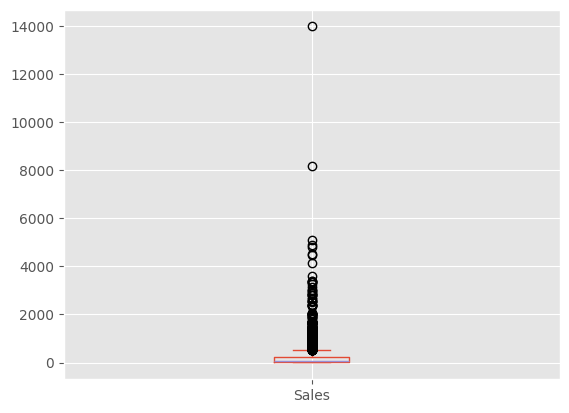

In [10]:
Amazon[['Sales']].plot(kind='box')
plt.show()

Tem dois produtos especificamente que se destoam bastante do padrão.

Ordenando o data frame em relação a vendas para obter informações desses dois produtos. Podemos ver que são da categoria "copiadoras" e "suprimentos".

In [11]:
Amazon.sort_values(by=['Sales'], ascending=False).head(5)

,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
Order ID,,,,,,,,,
CA-2014-140151,3/24/2014,3/26/2014,RaymondBuch@gmail.com,"United States,Seattle,Washington",Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4.0,6719.98
CA-2011-143917,7/25/2011,7/27/2011,KenLonsdale@gmail.com,"United States,San Francisco,California",Supplies,High Speed Automatic Electric Letter Opener,8187.65,5.0,327.51
CA-2014-135909,10/14/2014,10/21/2014,JaneWaco@gmail.com,"United States,Sacramento,California",Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.96,5.0,1906.48
CA-2013-136301,3/14/2013,3/16/2013,EdwardHooks@gmail.com,"United States,San Francisco,California",Supplies,High Speed Automatic Electric Letter Opener,4912.59,3.0,196.50
CA-2014-149881,4/2/2014,4/4/2014,NickCrebassa@gmail.com,"United States,San Francisco,California",Machines,Cubify CubeX 3D Printer Double Head Print,4799.98,2.0,360.00


**Entrando mais em detalhes na categoria de copiadoras.**

In [12]:
Copiadoras = Amazon.loc[Amazon['Category'] == 'Copiers']
Copiadoras.sort_values(by=['Sales'], ascending=False).head(5)

,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
Order ID,,,,,,,,,
CA-2014-140151,3/24/2014,3/26/2014,RaymondBuch@gmail.com,"United States,Seattle,Washington",Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4.0,6719.98
CA-2014-133865,5/9/2014,5/13/2014,PenelopeSewall@gmail.com,"United States,Los Angeles,California",Copiers,Canon Imageclass D680 Copier / Fax,3359.95,6.0,1049.98
CA-2012-111829,3/19/2012,3/20/2012,FredHopkins@gmail.com,"United States,Seattle,Washington",Copiers,Canon PC940 Copier,3149.93,7.0,1480.47
CA-2014-127432,1/23/2014,1/28/2014,AlanDominguez@gmail.com,"United States,Great Falls,Montana",Copiers,Canon Image Class D660 Copier,2999.95,5.0,1379.98
CA-2014-145219,12/25/2014,12/26/2014,RobertMarley@gmail.com,"United States,Los Angeles,California",Copiers,Hewlett Packard LaserJet 3310 Copier,2879.95,6.0,1007.98


Nas copiadoras a diferença é ainda maior, sendo a segunda mais vendida no mesmo ano com 3359.95 vendas. Então, esse dado provavelmente está incorreto.

Exlucindo dado do data frame.

In [13]:
Amazon = Amazon[(Amazon['Sales'] < 13999.96)]

**Em relação ao produto da categoria de suprimentos.**

In [14]:
Suprimentos = Amazon.loc[Amazon['Category'] == 'Supplies']
Suprimentos.sort_values(by=['Sales'], ascending=False).head(5)

,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
Order ID,,,,,,,,,
CA-2011-143917,7/25/2011,7/27/2011,KenLonsdale@gmail.com,"United States,San Francisco,California",Supplies,High Speed Automatic Electric Letter Opener,8187.65,5.0,327.51
CA-2013-136301,3/14/2013,3/16/2013,EdwardHooks@gmail.com,"United States,San Francisco,California",Supplies,High Speed Automatic Electric Letter Opener,4912.59,3.0,196.50
CA-2014-105851,3/14/2014,3/21/2014,SanjitEngle@gmail.com,"United States,Denver,Colorado",Supplies,Martin Yale Chadless Opener Electric Letter Op...,1332.50,2.0,-299.81
CA-2013-145919,12/19/2013,12/24/2013,HenryGoldwyn@gmail.com,"United States,Los Angeles,California",Supplies,Premier Electric Letter Opener,579.30,5.0,28.96
CA-2011-101931,10/28/2011,10/31/2011,ToddSumrall@gmail.com,"United States,Los Angeles,California",Supplies,Premier Automatic Letter Opener,480.74,2.0,14.42


Por mais que o priemiro e segundo produto sejam o mesmo, com o primeiro tendo quase o dobro de vendas, esse dado não pode ser considerado falso. Já que as amostras são de anos diferntes, sendo um de 2011 e outro de 2013, o que pode explicar a diferença da quantidade de vendas do mesmo produto.

**Observando o lucro.**

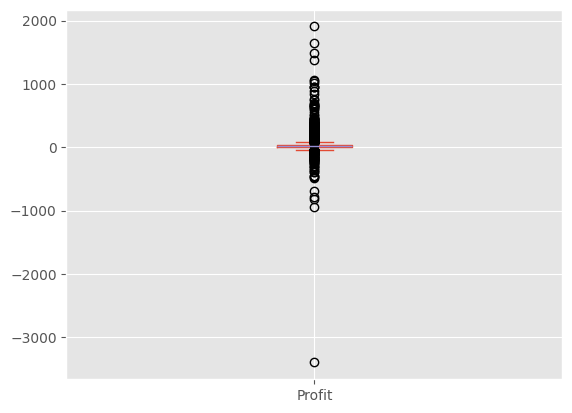

In [15]:
Amazon[['Profit']].plot(kind='box')
plt.show()

In [16]:
Amazon.sort_values(by=['Profit'], ascending=True).head(5)

,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
Order ID,,,,,,,,,
CA-2014-134845,4/18/2014,4/24/2014,SharelleRoach@gmail.com,"United States,Louisville,Colorado",Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.99,5.0,-3399.98
US-2013-157490,10/7/2013,10/8/2013,LaurelBeltran@gmail.com,"United States,Pueblo,Colorado",Machines,Zebra GK420t Direct Thermal/Thermal Transfer P...,703.71,6.0,-938.28
CA-2013-109869,4/23/2013,4/30/2013,TanjaNorvell@gmail.com,"United States,Phoenix,Arizona",Tables,Bush Advantage Collection Racetrack Conference...,1272.63,6.0,-814.48
US-2012-103471,12/24/2012,12/28/2012,JimRadford@gmail.com,"United States,Colorado Springs,Colorado",Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",590.06,7.0,-786.74
CA-2011-148383,12/27/2011,12/31/2011,ResiPÃ¶lking@gmail.com,"United States,Phoenix,Arizona",Binders,GBC DocuBind 300 Electric Binding Machine,946.76,6.0,-694.29


O produto com pior lucro tem uma diferença muito grande do segundo. Por isso provavelmente é um dado incorreto.

Removendo esse produto.

In [17]:
Amazon = Amazon[(Amazon['Profit'] > -3399.98)]

Depois dessas alterações, o data frame ficou da seguinte forma.

In [18]:
Amazon.describe()

,Sales,Quantity,Profit
count,3201.000000,3201.000000,3201.000000
mean,221.464505,3.828491,32.833002
std,463.326773,2.261557,112.592336
min,0.990000,1.000000,-938.280000
25%,19.440000,2.000000,3.850000
50%,60.810000,3.000000,11.170000
75%,215.590000,5.000000,32.940000
max,8187.650000,14.000000,1906.480000


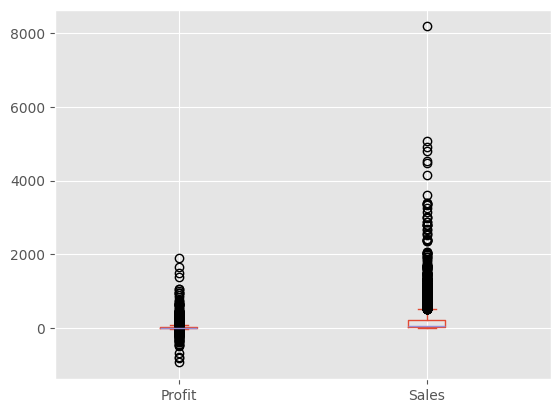

In [19]:
Amazon[['Profit', "Sales"]].plot(kind='box')
plt.show()

Os atributos "Ship date", "Email ID" e "Geography" não serão relevantes para analise do lucro, então vamos remover eles.

In [20]:
del Amazon['Ship Date']
del Amazon['EmailID']
del Amazon['Geography']

In [21]:
Amazon.head()

,Order Date,Category,Product Name,Sales,Quantity,Profit
Order ID,,,,,,
CA-2013-138688,6/13/2013,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
CA-2011-115812,6/9/2011,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
CA-2011-115812,6/9/2011,Art,Newell 322,7.28,4.0,1.97
CA-2011-115812,6/9/2011,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
CA-2011-115812,6/9/2011,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


#Porcentagem de Lucro por categoria

In [22]:
print(Amazon['Category'].unique())

['Labels' 'Furnishings' 'Art' 'Phones' 'Binders' 'Appliances' 'Tables'
 'Storage' 'Accessories' 'Paper' 'Chairs' 'Fasteners' 'Supplies'
 'Envelopes' 'Copiers' 'Bookcases' 'Machines']


Categoria

#Lucro Labels (Rótulos)

Separando categoria 'Labels'


In [23]:
Labels = Amazon.loc[Amazon['Category'] == 'Labels']

criando uma coluna de porcentagem do lucro

In [24]:
Labels['% profit'] = (Labels['Profit'] / Labels['Profit'].sum()) * 100

/tmp/ipython-input-3711717315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labels['% profit'] = (Labels['Profit'] / Labels['Profit'].sum()) * 100


Ordenando de forma descrecente

In [25]:
Labels = Labels.sort_values(by=['% profit'], ascending=False)

In [26]:
Labels.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2014-108560,7/9/2014,Labels,"Dot Matrix Printer Tape Reel Labels, White, 50...",786.48,8.0,385.38,16.733317
CA-2013-163328,11/5/2013,Labels,"Dot Matrix Printer Tape Reel Labels, White, 50...",629.18,8.0,228.08,9.903303
US-2012-164448,10/31/2012,Labels,Avery 4027 File Folder Labels for Dot Matrix P...,427.42,14.0,196.61,8.536866
CA-2011-110786,12/29/2011,Labels,Avery 477,274.77,9.0,126.39,5.487892
CA-2014-142643,10/16/2014,Labels,Avery 4027 File Folder Labels for Dot Matrix P...,152.65,5.0,70.22,3.048974
CA-2012-150714,10/26/2012,Labels,Avery 477,146.54,6.0,47.63,2.068109
CA-2011-102330,12/29/2011,Labels,Alphabetical Labels for Top Tab Filing,88.80,6.0,44.40,1.927862
US-2013-139087,7/18/2013,Labels,Round Specialty Laser Printer Labels,87.71,7.0,41.22,1.789785
CA-2012-121776,2/16/2012,Labels,Avery 485,87.71,7.0,41.22,1.789785


A table acima mostra os maiores lucros em ordem

In [27]:
Labels.describe()

,Sales,Quantity,Profit,% profit
count,116.000000,116.000000,116.000000,116.000000
mean,43.782069,4.137931,19.854052,0.862069
std,102.508052,2.498335,45.865331,1.991487
min,2.610000,1.000000,1.200000,0.052104
25%,9.675000,2.000000,4.230000,0.183668
50%,18.600000,3.000000,8.680000,0.376888
75%,39.420000,6.000000,18.560000,0.805881
max,786.480000,14.000000,385.380000,16.733317


Dá para perceber que pela forma como o lucro esta destribuido que valores a cima de 1.7 são os mais significantes para o lucro. O suqe contribuem mais de 1,7%.

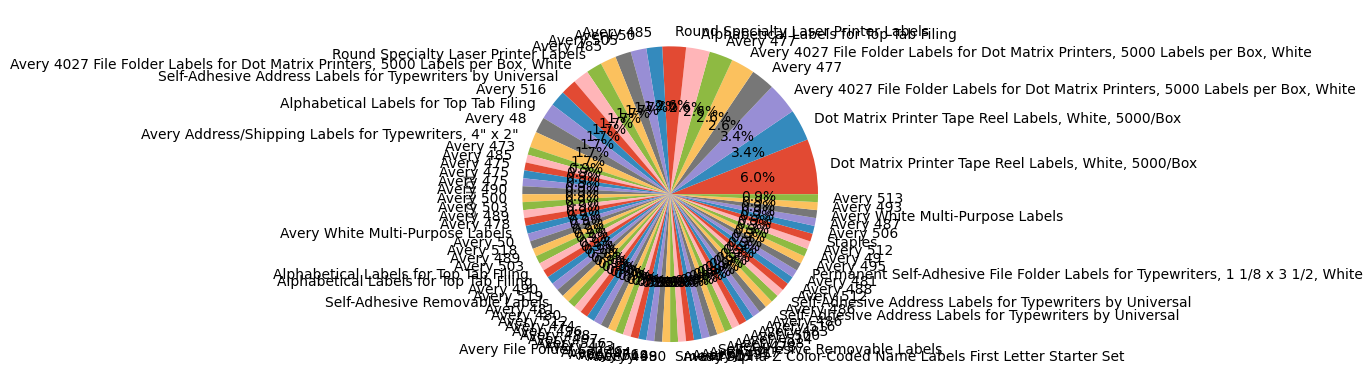

In [28]:
Labels['% profit'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels = Labels['Product Name'])
plt.show()

Gráfico de pizza dos lucros (Errado por enquanto)

#Lucro Furnishings (Móveis)

Separando categoria 'Furnishings'

In [29]:
Moveis = Amazon.loc[Amazon['Category'] == 'Furnishings']

criando uma coluna de porcentagem do lucro

In [30]:
Moveis['% profit'] = (Moveis['Profit'] / Moveis['Profit'].sum()) * 100

/tmp/ipython-input-1362821239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Moveis['% profit'] = (Moveis['Profit'] / Moveis['Profit'].sum()) * 100


Ordenando de forma descrecente

In [31]:
Moveis = Moveis.sort_values(by=['% profit'], ascending=False)

In [32]:
Moveis.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2013-107104,11/27/2013,Furnishings,"GE 48"" Fluorescent Tube, Cool White Energy Sav...",595.38,6.0,297.69,3.895829
CA-2013-115917,5/21/2013,Furnishings,Luxo Professional Fluorescent Magnifier Lamp w...,1049.20,5.0,272.79,3.569966
CA-2013-114860,12/23/2013,Furnishings,Deflect-o DuraMat Antistatic Studded Beveled M...,842.72,8.0,202.25,2.646818
CA-2014-144463,1/2/2014,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.43,11.0,199.26,2.607689
CA-2013-158694,11/11/2013,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",467.46,9.0,191.66,2.508228
CA-2014-169327,9/3/2014,Furnishings,Luxo Professional Combination Clamp-On Lamps,511.50,5.0,132.99,1.740422
CA-2013-136686,12/13/2013,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",383.64,6.0,122.76,1.606543
CA-2014-140053,7/4/2014,Furnishings,Tenex Traditional Chairmats for Medium Pile Ca...,545.85,9.0,114.63,1.500147
CA-2014-103968,12/2/2014,Furnishings,"Tenex ""The Solids"" Textured Chair Mats",629.64,9.0,107.04,1.400818


A table acima mostra os maiores lucros em ordem

In [33]:
Moveis.describe()

,Sales,Quantity,Profit,% profit
count,304.000000,304.000000,304.000000,304.000000
mean,98.923454,3.865132,25.135691,0.328947
std,139.058550,2.262822,37.647523,0.492688
min,3.480000,1.000000,-36.470000,-0.477278
25%,21.995000,2.000000,5.575000,0.072959
50%,43.130000,3.000000,12.390000,0.162146
75%,120.100000,5.000000,28.540000,0.373499
max,1049.200000,14.000000,297.690000,3.895829


Dá para perceber que nessa categoria os lucros são bem mais regulares, apenas se destacando os de 2.5 para cima, ou 2,5%.

Nesse casso como os valores progridem de forma bem constante não faz sentido colcoar em uma grafico, pois ele seria de forma bem divida e de varios elementos.

#Lucro Art (Arte)

Separando categoria 'Art'

In [34]:
Arte = Amazon.loc[Amazon['Category'] == 'Art']

criando uma coluna de porcentagem do lucro

In [35]:
Arte['% profit'] = (Arte['Profit'] / Arte['Profit'].sum()) * 100

/tmp/ipython-input-33516283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arte['% profit'] = (Arte['Profit'] / Arte['Profit'].sum()) * 100


Ordenando de forma descrecente

In [36]:
Arte = Arte.sort_values(by=['% profit'], ascending=False)

In [37]:
Arte.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
US-2011-134054,10/10/2011,Art,"Dixon Ticonderoga Core-Lock Colored Pencils, 4...",255.85,7.0,112.57,4.741486
CA-2014-100384,6/25/2014,Art,Boston Heavy-Duty Trimline Electric Pencil Sha...,385.60,8.0,111.82,4.709896
CA-2011-106376,12/5/2011,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...,1113.02,8.0,111.30,4.687994
CA-2011-107818,9/8/2011,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",303.84,8.0,91.15,3.839269
CA-2012-153794,9/11/2012,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",265.86,7.0,79.76,3.359518
CA-2013-146766,11/5/2013,Art,Boston Heavy-Duty Trimline Electric Pencil Sha...,192.80,4.0,55.91,2.354948
CA-2012-134117,12/17/2012,Art,Sanford 52201 APSCO Electric Pencil Sharpener,204.85,5.0,53.26,2.243329
CA-2012-165057,9/11/2012,Art,Boston 19500 Mighty Mite Electric Pencil Sharp...,181.35,9.0,48.96,2.062212
CA-2014-102379,12/3/2014,Art,Panasonic KP-380BK Classic Electric Pencil Sha...,179.90,5.0,44.98,1.894573


A table acima mostra os maiores lucros em ordem

In [38]:
Arte.describe()

,Sales,Quantity,Profit,% profit
count,250.000000,250.000000,250.000000,250.000000
mean,36.848240,3.704000,9.496600,0.400000
std,84.205637,2.105735,16.170561,0.681110
min,1.410000,1.000000,0.160000,0.006739
25%,8.265000,2.000000,2.047500,0.086241
50%,14.700000,3.000000,4.335000,0.182592
75%,35.715000,5.000000,10.142500,0.427206
max,1113.020000,11.000000,112.570000,4.741486


Essa categoria tem valores constantes que crescem de maneira lenta. Tendo um aumento mais brusco a partir de 3,3%.

#Lucro Phones (Telefones)

Separando categoria 'Phones'

In [39]:
Telefones = Amazon.loc[Amazon['Category'] == 'Phones']

criando uma coluna de porcentagem do lucro

In [40]:
Telefones['% profit'] = (Telefones['Profit'] / Telefones['Profit'].sum()) * 100

/tmp/ipython-input-3641172195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Telefones['% profit'] = (Telefones['Profit'] / Telefones['Profit'].sum()) * 100


Ordenando de forma descrecente

In [41]:
Telefones = Telefones.sort_values(by=['% profit'], ascending=False)

In [42]:
Telefones.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2013-159016,3/11/2013,Phones,Apple iPhone 5,4158.91,8.0,363.90,3.994082
US-2013-116729,12/26/2013,Phones,Samsung Galaxy Note 2,2575.94,7.0,257.59,2.827248
CA-2011-134313,11/1/2011,Phones,ClearOne CHATAttach 160 -Â speaker phone,1983.97,4.0,248.00,2.721990
CA-2013-160717,6/7/2013,Phones,Samsung Galaxy Mega 6.3,3023.93,9.0,226.79,2.489194
US-2012-128090,8/16/2012,Phones,Samsung Galaxy S4 Mini,1879.96,5.0,211.50,2.321375
US-2012-163279,3/22/2012,Phones,ClearOne CHATAttach 160 -Â speaker phone,1487.98,3.0,186.00,2.041493
CA-2013-160717,6/7/2013,Phones,Bose SoundLink Bluetooth Speaker,477.60,3.0,161.19,1.769184
CA-2012-164882,10/31/2012,Phones,Polycom SoundStation2 EX ConferenceÂ phone,1295.84,4.0,145.78,1.600047
CA-2013-108882,1/9/2013,Phones,netTALK DUO VoIP Telephone Service,377.93,9.0,141.72,1.555486


A table acima mostra os maiores lucros em ordem

In [43]:
Telefones.describe()

,Sales,Quantity,Profit,% profit
count,277.000000,277.000000,277.000000,277.000000
mean,356.261336,3.848375,32.891625,0.361011
std,462.123328,2.173316,48.041183,0.527289
min,5.560000,1.000000,-131.500000,-1.443313
25%,87.800000,2.000000,8.280000,0.090879
50%,211.170000,3.000000,20.700000,0.227198
75%,445.960000,5.000000,46.800000,0.513666
max,4158.910000,14.000000,363.900000,3.994082


Essa categoria tem valores constantes que crescem de maneira lenta.

#Lucro Binders (Fichários)

Separando categoria 'Phones'

In [44]:
Ficharios = Amazon.loc[Amazon['Category'] == 'Binders']

criando uma coluna de porcentagem do lucro

In [45]:
Ficharios['% profit'] = (Ficharios['Profit'] / Ficharios['Profit'].sum()) * 100

/tmp/ipython-input-2313084644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ficharios['% profit'] = (Ficharios['Profit'] / Ficharios['Profit'].sum()) * 100


Ordenando de forma descrecente

In [46]:
Ficharios = Ficharios.sort_values(by=['% profit'], ascending=False)

In [47]:
Ficharios.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2014-135909,10/14/2014,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.96,5.0,1906.48,11.843911
CA-2013-138478,10/22/2013,Binders,Ibico EPK-21 Electric Binding System,4535.98,3.0,1644.29,10.215069
CA-2011-144414,6/17/2011,Binders,GBC DocuBind P400 Electric Binding System,3266.38,3.0,1061.57,6.594950
CA-2014-119809,8/19/2014,Binders,Fellowes PB300 Plastic Comb Binding Machine,2793.53,9.0,942.82,5.857222
US-2014-163300,9/16/2014,Binders,GBC DocuBind 200 Manual Binding Machine,2357.49,7.0,884.06,5.492178
CA-2011-128524,11/11/2011,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,2033.58,2.0,762.59,4.737552
CA-2014-111738,1/4/2014,Binders,GBC ProClick 150 Presentation Binding System,2022.27,8.0,682.52,4.240121
CA-2011-169726,8/9/2011,Binders,Ibico Ibimaster 300 Manual Binding System,2060.74,7.0,643.98,4.000693
US-2014-142188,9/12/2014,Binders,Ibico Ibimaster 300 Manual Binding System,1471.96,5.0,459.99,2.857665


A table acima mostra os maiores lucros em ordem

In [48]:
Ficharios.describe()

,Sales,Quantity,Profit,% profit
count,471.000000,471.000000,471.000000,471.000000
mean,118.813333,3.966030,34.175605,0.212314
std,436.650594,2.396565,160.662745,0.998109
min,1.080000,1.000000,-694.290000,-4.313242
25%,11.585000,2.000000,2.660000,0.016525
50%,22.920000,3.000000,6.890000,0.042804
75%,63.730000,5.000000,19.440000,0.120770
max,5083.960000,14.000000,1906.480000,11.843911


É possível perceber uma variação muito grande a partir de 5.4%, assim os 5 primeiros itens representam uma grande parte do lucro dessa categória.

#Appliances (Eletrodomésticos)

Separando categoria 'Appliances'

In [49]:
Eletro = Amazon.loc[Amazon['Category'] == 'Appliances']

criando uma coluna de porcentagem do lucro

In [50]:
Eletro['% profit'] = (Eletro['Profit'] / Eletro['Profit'].sum()) * 100

/tmp/ipython-input-2659075261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eletro['% profit'] = (Eletro['Profit'] / Eletro['Profit'].sum()) * 100


Ordenando de forma descrecente

In [51]:
Eletro = Eletro.sort_values(by=['% profit'], ascending=False)

In [52]:
Eletro.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2014-166093,8/18/2014,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,2518.29,9.0,654.76,7.925658
CA-2014-123491,10/31/2014,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",1702.12,14.0,510.64,6.181132
CA-2012-160171,10/19/2012,Appliances,Sanyo Counter Height Refrigerator with Crisper...,1640.70,5.0,459.40,5.560888
CA-2014-107517,2/6/2014,Appliances,Sanyo Counter Height Refrigerator with Crisper...,1640.70,5.0,459.40,5.560888
CA-2013-114972,11/4/2013,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,1101.48,4.0,429.58,5.199927
CA-2012-155306,4/17/2012,Appliances,Hoover Upright Vacuum With Dirt Cup,1447.65,5.0,419.82,5.081785
CA-2014-156776,8/8/2014,Appliances,3.6 Cubic Foot Counter Height Office Refrigerator,1473.10,5.0,412.47,4.992816
CA-2012-103835,9/24/2012,Appliances,Hoover Upright Vacuum With Dirt Cup,1158.12,4.0,335.85,4.065356
CA-2011-126361,8/4/2011,Appliances,Hoover WindTunnel Plus Canister Vacuum,1089.75,3.0,305.13,3.693500


A table acima mostra os maiores lucros em ordem

In [53]:
Eletro.describe()

,Sales,Quantity,Profit,% profit
count,136.000000,136.000000,136.000000,136.000000
mean,222.325882,3.617647,60.744632,0.735294
std,390.159209,2.204570,110.553912,1.338219
min,2.600000,1.000000,0.290000,0.003510
25%,43.650000,2.000000,11.842500,0.143350
50%,83.605000,3.000000,22.660000,0.274292
75%,205.357500,5.000000,55.172500,0.667845
max,2518.290000,14.000000,654.760000,7.925658


Uma categoria consistente que aumenta os valores de maneira lenta, não tendo um elemento tão significativo para o lucro

#Lucro Tables (Mesas)

Separando categoria 'Tables'

In [54]:
Mesas = Amazon.loc[Amazon['Category'] == 'Tables']

criando uma coluna de porcentagem do lucro

In [55]:
Mesas['% profit'] = (Mesas['Profit'] / Mesas['Profit'].sum()) * 100

/tmp/ipython-input-2577364624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mesas['% profit'] = (Mesas['Profit'] / Mesas['Profit'].sum()) * 100


Ordenando de forma descrecente

In [56]:
Mesas = Mesas.sort_values(by=['% profit'], ascending=False)
Mesas.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2013-105081,12/26/2013,Tables,SAFCO PlanMaster Heigh-Adjustable Drafting Tab...,1747.25,5.0,629.01,42.427574
CA-2012-164301,3/26/2012,Tables,Bush Advantage Collection Racetrack Conference...,3393.68,8.0,610.86,41.203332
CA-2012-137113,12/1/2012,Tables,Bush Advantage Collection Round Conference Table,1913.40,9.0,401.81,27.102627
CA-2011-126683,9/29/2011,Tables,"Bevis Oval Conference Table, Walnut",2348.82,9.0,399.30,26.933324
CA-2014-107174,11/7/2014,Tables,Hon 5100 Series Wood Tables,2036.86,7.0,366.63,24.729689
US-2012-126214,12/21/2012,Tables,Bevis 36 x 72 Conference Tables,1618.37,13.0,356.04,24.015379
CA-2013-132304,6/15/2013,Tables,Hon Non-Folding Utility Tables,1115.17,7.0,334.55,22.565849
US-2013-102239,5/6/2013,Tables,Global Adaptabilities Conference Tables,1685.88,6.0,320.32,21.606017
CA-2011-151995,10/13/2011,Tables,"Bevis Round Bullnose 29"" High Table Top",1298.55,5.0,311.65,21.021213


A table acima mostra os maiores lucros em ordem

In [57]:
Mesas.describe()

,Sales,Quantity,Profit,% profit
count,116.000000,116.000000,116.000000,116.000000
mean,730.643017,4.146552,12.780603,0.862069
std,689.288970,2.631760,187.391691,12.639823
min,24.370000,1.000000,-814.480000,-54.937776
25%,271.812500,2.000000,-25.165000,-1.697413
50%,514.450000,3.000000,7.220000,0.486999
75%,935.567500,5.250000,80.487500,5.428991
max,3610.850000,13.000000,629.010000,42.427574


Os dois primeiros elementos fazem parte da maior parte do lucro desas categoria.

#Lucro Storage (Amazenamento)

Separando categoria 'Storage'

In [58]:
Armazenamento = Amazon.loc[Amazon['Category'] == 'Storage']

criando uma coluna de porcentagem do lucro

In [59]:
Armazenamento['% profit'] = (Armazenamento['Profit'] / Armazenamento['Profit'].sum()) * 100

/tmp/ipython-input-3680455956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Armazenamento['% profit'] = (Armazenamento['Profit'] / Armazenamento['Profit'].sum()) * 100


Ordenando de forma descrecente

In [60]:
Armazenamento = Armazenamento.sort_values(by=['% profit'], ascending=False)
Armazenamento.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2012-111829,3/19/2012,Storage,Deluxe Rollaway Locking File with Drawer,1247.64,3.0,349.34,4.040748
US-2011-131275,3/18/2011,Storage,Tennsco 6- and 18-Compartment Lockers,1856.19,7.0,334.11,3.864585
CA-2011-106726,12/6/2011,Storage,Standard Rollaway File with Lock,1261.33,7.0,327.95,3.793334
CA-2014-100650,6/30/2014,Storage,Tennsco 16-Compartment Lockers with Coat Rack,1295.78,2.0,310.99,3.597161
CA-2014-119809,8/19/2014,Storage,Letter Size Cart,1000.02,7.0,290.01,3.354489
CA-2014-138380,12/22/2014,Storage,Letter Size Cart,1000.02,7.0,290.01,3.354489
CA-2013-144218,11/1/2013,Storage,"Dual Level, Single-Width Filing Carts",1085.42,7.0,282.21,3.264268
CA-2012-121188,8/28/2012,Storage,"Hot File 7-Pocket, Floor Stand",892.35,5.0,267.70,3.096434
US-2012-114741,12/6/2012,Storage,Tennsco 6- and 18-Compartment Lockers,1325.85,5.0,238.65,2.760418


A table acima mostra os maiores lucros em ordem

In [61]:
Armazenamento.describe()

,Sales,Quantity,Profit,% profit
count,266.000000,266.000000,266.000000,266.000000
mean,265.161053,3.906015,32.501617,0.375940
std,320.150449,2.363760,69.726405,0.806512
min,5.980000,1.000000,-167.270000,-1.934779
25%,50.457500,2.000000,3.082500,0.035655
50%,135.530000,3.000000,9.855000,0.113991
75%,344.910000,5.000000,38.742500,0.448127
max,1856.190000,14.000000,349.340000,4.040748


Uma cateogria bem consistente com valores aumentando de maneira lenta.

#Lucro Accessories (Acessórios)

Separando categoria 'Accessories'

In [62]:
Acessorios = Amazon.loc[Amazon['Category'] == 'Accessories']

criando uma coluna de porcentagem do lucro

In [63]:
Acessorios['% profit'] = (Acessorios['Profit'] / Acessorios['Profit'].sum()) * 100

/tmp/ipython-input-696004885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Acessorios['% profit'] = (Acessorios['Profit'] / Acessorios['Profit'].sum()) * 100


Ordenando de forma descrecente

In [64]:
Acessorios = Acessorios.sort_values(by=['% profit'], ascending=False)
Acessorios.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2014-168109,7/4/2014,Accessories,Plantronics Savi W720 Multi-Device Wireless He...,1687.80,4.0,742.63,4.504990
US-2014-167318,7/27/2014,Accessories,LogitechÂ Z-906 Speaker sys - home theater - 5...,1649.95,5.0,659.98,4.003613
CA-2013-153598,12/4/2013,Accessories,LogitechÂ Z-906 Speaker sys - home theater - 5...,1649.95,5.0,659.98,4.003613
CA-2013-145625,9/12/2013,Accessories,LogitechÂ P710e Mobile Speakerphone,3347.37,13.0,636.00,3.858144
CA-2014-143686,5/15/2014,Accessories,Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...,1399.93,7.0,601.97,3.651709
CA-2012-157084,12/19/2012,Accessories,Plantronics Savi W720 Multi-Device Wireless He...,1265.85,3.0,556.97,3.378727
CA-2014-123085,3/4/2014,Accessories,Imation Bio 2GB USBÂ Flash Drive ImationÂ Corp,1049.44,8.0,440.76,2.673767
CA-2012-158491,6/4/2012,Accessories,LogitechÂ Z-906 Speaker sys - home theater - 5...,989.97,3.0,395.99,2.402180
CA-2012-109638,12/15/2012,Accessories,Logitech G700s Rechargeable Gaming Mouse,899.91,9.0,377.96,2.292805


A table acima mostra os maiores lucros em ordem

In [65]:
Acessorios.describe()

,Sales,Quantity,Profit,% profit
count,258.000000,258.000000,258.000000,258.000000
mean,236.876357,4.000000,63.893837,0.387597
std,358.715382,2.487322,114.752494,0.696119
min,0.990000,1.000000,-35.990000,-0.218325
25%,58.205000,2.000000,8.882500,0.053884
50%,112.370000,3.000000,27.935000,0.169461
75%,239.970000,5.000000,69.230000,0.419967
max,3347.370000,14.000000,742.630000,4.504990


Cateogria bem consistente com valores que aumentam de manira lenta.

#Lucro Paper (Papel)

Separando categoria 'Paper'

In [66]:
Papel = Amazon.loc[Amazon['Category'] == 'Paper']

criando uma coluna de porcentagem do lucro

In [67]:
Papel['% profit'] = (Papel['Profit'] / Papel['Profit'].sum()) * 100

/tmp/ipython-input-1862357996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Papel['% profit'] = (Papel['Profit'] / Papel['Profit'].sum()) * 100


Ordenando de forma descrecente

In [68]:
Papel = Papel.sort_values(by=['% profit'], ascending=False)
Papel.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2011-140662,11/17/2011,Paper,Xerox 1941,733.95,7.0,352.30,2.906996
CA-2011-126361,8/4/2011,Paper,Xerox 1934,447.84,8.0,219.44,1.810704
CA-2014-129357,5/15/2014,Paper,Xerox 1917,440.19,9.0,206.89,1.707148
CA-2013-133935,9/19/2013,Paper,Xerox 1945,368.91,9.0,180.77,1.491620
CA-2012-105347,11/24/2012,Paper,Xerox 1919,368.91,9.0,180.77,1.491620
CA-2014-166296,3/14/2014,Paper,Multicolor Computer Printout Paper,314.55,3.0,150.98,1.245808
CA-2013-109365,11/4/2013,Paper,Multicolor Computer Printout Paper,314.55,3.0,150.98,1.245808
CA-2014-139402,12/10/2014,Paper,Multicolor Computer Printout Paper,419.40,5.0,146.79,1.211235
CA-2014-167640,3/7/2014,Paper,Xerox 1893,286.93,7.0,140.60,1.160158


A table acima mostra os maiores lucros em ordem

In [69]:
Papel.describe()

,Sales,Quantity,Profit,% profit
count,450.000000,450.000000,450.000000,450.000000
mean,59.252733,3.782222,26.931200,0.222222
std,77.710012,2.219903,35.875962,0.296030
min,4.280000,1.000000,1.810000,0.014935
25%,15.587500,2.000000,6.640000,0.054790
50%,31.100000,3.000000,13.500000,0.111395
75%,62.547500,5.000000,28.792500,0.237581
max,733.950000,14.000000,352.300000,2.906996


Cateogria bem consistente com valores que aumentam de manira lenta.

#Lucro Chairs (Cadeiras)

Separando categoria 'Chairs'

In [70]:
Cadeiras = Amazon.loc[Amazon['Category'] == 'Chairs']

criando uma coluna de porcentagem do lucro

In [71]:
Cadeiras['% profit'] = (Cadeiras['Profit'] / Cadeiras['Profit'].sum()) * 100

/tmp/ipython-input-2422082872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cadeiras['% profit'] = (Cadeiras['Profit'] / Cadeiras['Profit'].sum()) * 100


Ordenando de forma descrecente

In [72]:
Cadeiras = Cadeiras.sort_values(by=['% profit'], ascending=False)
Cadeiras.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2012-111038,12/1/2012,Chairs,GuestStacker Chair with Chrome Finish Legs,2676.67,9.0,267.67,6.645844
CA-2014-149559,9/12/2014,Chairs,Hon Pagoda Stacking Chairs,2054.27,8.0,256.78,6.375461
US-2013-163881,11/25/2013,Chairs,Global Leather Executive Chair,1684.75,6.0,210.59,5.228633
CA-2014-122490,11/14/2014,Chairs,Global Troy Executive Leather Low-Back Tilter,2404.70,6.0,150.29,3.731475
CA-2013-149279,4/25/2013,Chairs,SAFCO Arco Folding Chair,1325.76,6.0,149.15,3.703170
CA-2011-154893,12/21/2011,Chairs,SAFCO Arco Folding Chair,1325.76,6.0,149.15,3.703170
CA-2011-166954,4/25/2011,Chairs,GuestStacker Chair with Chrome Finish Legs,1487.04,5.0,148.70,3.691998
CA-2011-125731,9/10/2011,Chairs,GuestStacker Chair with Chrome Finish Legs,1487.04,5.0,148.70,3.691998
CA-2012-137113,12/1/2012,Chairs,Global Troy Executive Leather Low-Back Tilter,2003.92,5.0,125.25,3.109769


A table acima mostra os maiores lucros em ordem

In [73]:
Cadeiras.describe()

,Sales,Quantity,Profit,% profit
count,207.000000,207.000000,207.000000,207.000000
mean,491.697391,3.545894,19.457150,0.483092
std,465.129475,1.876417,58.652199,1.456246
min,40.780000,1.000000,-219.160000,-5.441413
25%,194.350000,2.000000,-11.860000,-0.294466
50%,338.350000,3.000000,13.760000,0.341640
75%,603.920000,4.500000,46.570000,1.156263
max,2803.920000,12.000000,267.670000,6.645844


Essa categória tem uma consistencia média, com os três primeiros elemntos representando a maior parte de lucro, sendo 17% do lucro

#Lucro Fasteners (Fixadores)

Separando categoria 'Fasteners'

In [74]:
Fixadores = Amazon.loc[Amazon['Category'] == 'Fasteners']

criando uma coluna de porcentagem do lucro

In [75]:
Fixadores['% profit'] = (Fixadores['Profit'] / Fixadores['Profit'].sum()) * 100

/tmp/ipython-input-2587584719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixadores['% profit'] = (Fixadores['Profit'] / Fixadores['Profit'].sum()) * 100


Ordenando de forma descrecente

In [76]:
Fixadores = Fixadores.sort_values(by=['% profit'], ascending=False)
Fixadores.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2012-158456,12/24/2012,Fasteners,Vinyl Coated Wire Paper Clips in Organizer Box...,45.92,4.0,21.58,7.841855
CA-2014-140186,9/30/2014,Fasteners,Advantus Plastic Paper Clips,35.00,7.0,16.80,6.104873
CA-2011-153983,11/29/2011,Fasteners,Staples,30.40,5.0,15.20,5.523457
CA-2011-127012,8/11/2011,Fasteners,Vinyl Coated Wire Paper Clips in Organizer Box...,22.96,2.0,10.79,3.920927
CA-2013-111115,7/26/2013,Fasteners,OIC Binder Clips,21.48,6.0,10.74,3.902758
CA-2013-103947,4/2/2013,Fasteners,Staples,31.56,5.0,9.86,3.582979
CA-2014-130631,12/30/2014,Fasteners,Acco Glide Clips,19.60,5.0,9.60,3.488499
CA-2011-111451,12/26/2011,Fasteners,Vinyl Coated Wire Paper Clips in Organizer Box...,27.55,3.0,9.30,3.379483
CA-2014-149944,11/13/2014,Fasteners,Staples,18.24,3.0,9.12,3.314074


A table acima mostra os maiores lucros em ordem

In [77]:
Fixadores.describe()

,Sales,Quantity,Profit,% profit
count,72.000000,72.000000,72.000000,72.000000
mean,12.822222,3.652778,3.822083,1.388889
std,13.534274,1.979897,4.755791,1.728184
min,1.810000,1.000000,-11.830000,-4.298848
25%,4.990000,2.000000,0.785000,0.285257
50%,8.980000,3.000000,2.700000,0.981140
75%,15.065000,5.000000,5.710000,2.074930
max,93.360000,12.000000,21.580000,7.841855


Essa categoria tem uma boa consistencia, com os valores crescendo de maneira lenta

#Lucro Supplies (Suprimentos)

Separando categoria 'Supplies'

In [78]:
Suprimentos = Amazon.loc[Amazon['Category'] == 'Supplies']

criando uma coluna de porcentagem do lucro

In [79]:
Suprimentos['% profit'] = (Suprimentos['Profit'] / Suprimentos['Profit'].sum()) * 100

/tmp/ipython-input-1910757282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Suprimentos['% profit'] = (Suprimentos['Profit'] / Suprimentos['Profit'].sum()) * 100


Ordenando de forma descrecente

In [80]:
Suprimentos = Suprimentos.sort_values(by=['% profit'], ascending=False)
Suprimentos.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2011-143917,7/25/2011,Supplies,High Speed Automatic Electric Letter Opener,8187.65,5.0,327.51,52.310371
CA-2013-136301,3/14/2013,Supplies,High Speed Automatic Electric Letter Opener,4912.59,3.0,196.50,31.385264
US-2014-123862,1/8/2014,Supplies,Acme Galleria Hot Forged Steel Scissors with C...,110.11,7.0,31.93,5.099906
CA-2013-145919,12/19/2013,Supplies,Premier Electric Letter Opener,579.30,5.0,28.96,4.625533
CA-2014-137918,9/30/2014,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,97.30,7.0,28.22,4.507339
CA-2013-140613,7/23/2013,Supplies,"Fiskars 8"" Scissors, 2/Pack",86.20,5.0,25.00,3.993036
CA-2013-145583,10/14/2013,Supplies,Fiskars Softgrip Scissors,65.88,6.0,18.45,2.946861
CA-2013-149671,6/6/2013,Supplies,Acme Box Cutter Scissors,61.38,6.0,15.96,2.549154
CA-2011-101931,10/28/2011,Supplies,Premier Automatic Letter Opener,480.74,2.0,14.42,2.303183


A table acima mostra os maiores lucros em ordem

In [81]:
Suprimentos.describe()

,Sales,Quantity,Profit,% profit
count,69.000000,69.000000,69.000000,69.000000
mean,262.711884,3.449275,9.073768,1.449275
std,1144.256093,1.753452,59.127938,9.444000
min,5.840000,1.000000,-299.810000,-47.886087
25%,13.880000,2.000000,1.550000,0.247568
50%,27.960000,3.000000,4.770000,0.761871
75%,49.500000,5.000000,9.260000,1.479021
max,8187.650000,7.000000,327.510000,52.310371


Consistencia muito baixa, os ultimos dois valores representando a maior parte do lucro, e tendo um item com um lucro negativo muito alto.

#Lucro Envelopes (Envelopes)

Separando categoria 'Supplies'

In [82]:
Envelopes = Amazon.loc[Amazon['Category'] == 'Envelopes']

criando uma coluna de porcentagem do lucro

In [83]:
Envelopes['% profit'] = (Envelopes['Profit'] / Envelopes['Profit'].sum()) * 100

/tmp/ipython-input-2764183398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Envelopes['% profit'] = (Envelopes['Profit'] / Envelopes['Profit'].sum()) * 100


Ordenando de forma descrecente

In [84]:
Envelopes = Envelopes.sort_values(by=['% profit'], ascending=False)
Envelopes.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2013-160941,7/22/2013,Envelopes,Ames Color-File Green Diamond Border X-ray Mai...,419.90,5.0,197.35,10.339552
CA-2013-100944,9/25/2013,Envelopes,"Tyvek Interoffice Envelopes, 9 1/2"" x 12 1/2"",...",304.90,5.0,143.30,7.507767
CA-2012-118871,12/4/2012,Envelopes,Tyvek Side-Opening Peel & Seel Expanding Envel...,271.44,3.0,122.15,6.399677
CA-2012-135580,12/30/2012,Envelopes,Tyvek Side-Opening Peel & Seel Expanding Envel...,271.44,3.0,122.15,6.399677
CA-2012-110289,10/29/2012,Envelopes,"Strathmore #10 Envelopes, Ultimate White",210.84,4.0,103.31,5.412613
CA-2012-121965,6/19/2012,Envelopes,Cameo Buff Policy Envelopes,186.69,3.0,87.74,4.596870
CA-2011-112851,9/17/2011,Envelopes,"Tyvek Interoffice Envelopes, 9 1/2"" x 12 1/2"",...",182.94,3.0,85.98,4.504660
CA-2012-136735,7/26/2012,Envelopes,Airmail Envelopes,167.86,2.0,78.89,4.133201
CA-2013-144092,11/6/2013,Envelopes,"Strathmore #10 Envelopes, Ultimate White",158.13,3.0,77.48,4.059329


A table acima mostra os maiores lucros em ordem

In [85]:
Envelopes.describe()

,Sales,Quantity,Profit,% profit
count,67.000000,67.000000,67.000000,67.000000
mean,61.464179,3.388060,28.487910,1.492537
std,83.362510,1.800296,39.082738,2.047621
min,4.080000,1.000000,1.920000,0.100593
25%,14.315000,2.000000,6.230000,0.326402
50%,22.920000,3.000000,10.870000,0.569501
75%,68.910000,5.000000,32.025000,1.677852
max,419.900000,9.000000,197.350000,10.339552


Consistencia baixa pois o primeiro item representa 10% do lucro da categoria, que ainda possui valores mais discrepantes até o quarto item.

#Lucro Copiers (Copiadoras)

Separando categoria 'Copiers'

In [86]:
Copiadoras = Amazon.loc[Amazon['Category'] == 'Copiers']

criando uma coluna de porcentagem do lucro

In [87]:
Copiadoras['% profit'] = (Copiadoras['Profit'] / Copiadoras['Profit'].sum()) * 100

/tmp/ipython-input-96558759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Copiadoras['% profit'] = (Copiadoras['Profit'] / Copiadoras['Profit'].sum()) * 100


Ordenando de forma descrecente

In [88]:
Copiadoras = Copiadoras.sort_values(by=['% profit'], ascending=False)
Copiadoras.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2012-111829,3/19/2012,Copiers,Canon PC940 Copier,3149.93,7.0,1480.47,11.742996
CA-2014-127432,1/23/2014,Copiers,Canon Image Class D660 Copier,2999.95,5.0,1379.98,10.945915
CA-2014-133865,5/9/2014,Copiers,Canon Imageclass D680 Copier / Fax,3359.95,6.0,1049.98,8.328376
CA-2014-145219,12/25/2014,Copiers,Hewlett Packard LaserJet 3310 Copier,2879.95,6.0,1007.98,7.995234
CA-2013-129630,9/5/2013,Copiers,Canon PC1060 Personal Laser Copier,2799.96,5.0,944.99,7.495602
CA-2013-135265,7/8/2013,Copiers,Canon PC1060 Personal Laser Copier,2799.96,5.0,944.99,7.495602
US-2014-135013,7/25/2014,Copiers,Hewlett Packard LaserJet 3310 Copier,2399.96,5.0,839.99,6.662748
US-2011-135972,9/21/2011,Copiers,Canon PC1080F Personal Copier,1799.97,3.0,701.99,5.568141
CA-2013-139997,7/2/2013,Copiers,Hewlett Packard 310 Color Digital Copier,1499.95,5.0,449.99,3.569293


A table acima mostra os maiores lucros em ordem

In [89]:
Copiadoras.describe()

,Sales,Quantity,Profit,% profit
count,24.000000,24.000000,24.000000,24.000000
mean,1489.552917,3.500000,525.302500,4.166667
std,1010.993468,1.719454,419.067662,3.324019
min,299.990000,1.000000,60.000000,0.475916
25%,599.972500,2.000000,203.242500,1.612107
50%,1199.970000,3.000000,406.490000,3.224253
75%,2499.960000,5.000000,866.240000,6.870962
max,3359.950000,7.000000,1480.470000,11.742996


Categoria muito inconsitente com os dois primeiros itens representando aproximadamente 20% do lucro da categoria.

#Lucro Bookcases (Estantes)

Separando categoria 'Bookcases'

In [90]:
Estantes = Amazon.loc[Amazon['Category'] == 'Bookcases']

criando uma coluna de porcentagem do lucro

In [91]:
Estantes['% profit'] = (Estantes['Profit'] / Estantes['Profit'].sum()) * 100

/tmp/ipython-input-2835015646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Estantes['% profit'] = (Estantes['Profit'] / Estantes['Profit'].sum()) * 100


Ordenando de forma descrecente

In [92]:
Estantes = Estantes.sort_values(by=['% profit'], ascending=False)
Estantes.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
US-2012-103471,12/24/2012,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",590.06,7.0,-786.74,47.782279
CA-2014-141117,10/3/2014,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,217.76,6.0,-384.72,23.365786
US-2014-112347,12/3/2014,Bookcases,Hon 4-Shelf Metal Bookcases,242.35,8.0,-363.53,22.078821
US-2014-139647,5/12/2014,Bookcases,Bestar Classic Bookcase,209.98,7.0,-356.96,21.679795
CA-2011-146591,1/20/2011,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,181.47,5.0,-320.60,19.471488
US-2012-165743,11/20/2012,Bookcases,Sauder Barrister Bookcases,145.76,6.0,-247.80,15.050015
US-2014-132059,9/24/2014,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",180.59,2.0,-240.78,14.623659
CA-2012-143364,7/14/2012,Bookcases,"Hon Metal Bookcases, Black",127.76,6.0,-191.65,11.639771
CA-2013-157707,10/11/2013,Bookcases,"Bush Westfield Collection Bookcases, Dark Cher...",90.88,3.0,-190.85,11.591184


A table acima mostra os maiores lucros em ordem

In [93]:
Estantes.describe()

,Sales,Quantity,Profit,% profit
count,80.000000,80.000000,80.000000,80.000000
mean,450.051500,3.825000,-20.581375,1.250000
std,506.639467,2.443151,148.286784,9.006127
min,48.580000,1.000000,-786.740000,-15.784295
25%,147.635000,2.000000,-29.610000,-2.182191
50%,290.670000,3.000000,11.240000,-0.682656
75%,512.915000,5.000000,35.930000,1.798349
max,3406.660000,13.000000,259.890000,47.782279


Uma categoria bem inconsistente onde os porudots em lucros positivos e negativos bem assentuados e os valores de lucro mudando de maneira mais drástica

#Lucro Machines (Máquinas)

Separando categoria 'Machines'

In [94]:
Maquinas = Amazon.loc[Amazon['Category'] == 'Machines']

criando uma coluna de porcentagem do lucro

In [95]:
Maquinas['% profit'] = (Maquinas['Profit'] / Maquinas['Profit'].sum()) * 100

/tmp/ipython-input-4063856639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Maquinas['% profit'] = (Maquinas['Profit'] / Maquinas['Profit'].sum()) * 100


Ordenando de forma descrecente

In [96]:
Maquinas = Maquinas.sort_values(by=['% profit'], ascending=False)
Maquinas.head(10)

,Order Date,Category,Product Name,Sales,Quantity,Profit,% profit
Order ID,,,,,,,
CA-2013-100300,6/25/2013,Machines,Okidata MB760 Printer,4476.80,4.0,503.64,18.109837
US-2011-131275,3/18/2011,Machines,Swingline SM12-08 MicroCut Jam Free Shredder,1279.97,4.0,415.99,14.958127
CA-2013-169663,3/11/2013,Machines,Okidata MB760 Printer,3357.60,3.0,377.73,13.582378
CA-2014-149881,4/2/2014,Machines,Cubify CubeX 3D Printer Double Head Print,4799.98,2.0,360.00,12.944844
CA-2012-149846,5/22/2012,Machines,Zebra GX420t Direct Thermal/Thermal Transfer P...,2973.32,7.0,334.50,12.027918
CA-2011-110786,12/29/2011,Machines,DYMO CardScan Personal V9 Business Card Scanner,767.95,6.0,287.98,10.355156
CA-2012-135580,12/30/2012,Machines,Zebra GX420t Direct Thermal/Thermal Transfer P...,2548.56,6.0,286.71,10.309490
CA-2011-146969,9/29/2011,Machines,Star Micronics TSP800 TSP847IIU Receipt Printer,686.32,2.0,223.05,8.020410
CA-2012-121797,1/30/2012,Machines,Bady BDG101FRU Card Printer,1919.98,3.0,216.00,7.766907


A table acima mostra os maiores lucros em ordem

In [97]:
Maquinas.describe()

,Sales,Quantity,Profit,% profit
count,38.000000,38.000000,38.000000,38.000000
mean,1049.846053,3.736842,73.185000,2.631579
std,1223.749994,2.274229,257.685693,9.265837
min,11.560000,1.000000,-938.280000,-33.738579
25%,274.470000,2.000000,33.130000,1.191285
50%,558.400000,3.000000,79.105000,2.844450
75%,1219.975000,5.000000,214.395000,7.709194
max,4799.980000,11.000000,503.640000,18.109837


Categoria muito inconsistente com os primeiros elementos representando a maior parte do lucro da categoria, e tendo um item com lucro negativo muito grande



-----







